In [1]:
import pandas as pd

rating_df = pd.read_csv('../static/csvs/celeb_ratings.csv')

In [2]:
attract_df = rating_df[['Filename', 'attractive']]


In [6]:
att_min = attract_df['attractive'].min()
att_max = attract_df['attractive'].max()

In [8]:
print att_min, att_max

2.01037476803 8.03477849416


In [9]:
import numpy as np

n_steps = np.linspace(att_min, att_max, num=100)

In [10]:
n_steps.shape

(100,)

In [11]:
n_names = []
n_values = []
n_num = 100
trait = 'attractive'
for i in range(n_num):
    anchor_value = n_steps[i]
    attract_df['distance'] = (attract_df[trait]-anchor_value).abs()
    attract_df = attract_df.sort_values(by=['distance'])
    
    n_names.append(attract_df.iloc[0]['Filename'])
    n_values.append(attract_df.iloc[0][trait])
    

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
n_steps[99] - att_max

0.0

In [20]:
import os
dst_dir = '/Users/amanda/Github/economic_face_perception/ptdir/static/images/attractive_crop/'
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

In [22]:
import shutil
import pickle
with open('gt-100.txt', 'rb') as fp:
    file_lst = pickle.load(fp)

for cur_file in file_lst:
    src_file = '/Users/amanda/Dropbox/dataset/celebA/oneface/' + cur_file        
    try:
        shutil.copy(src_file, dst_dir)
    except IOError as e:
        print('unable to copy file. %s' % e)
    except:
        print('Unexpected error:', sys)
    
print 'Done'

Done


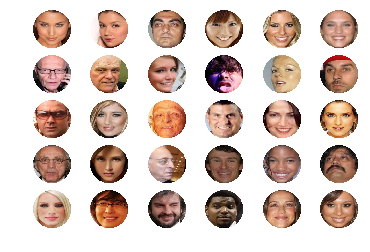

In [38]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
from pylab import imread,subplot,imshow,show
import cv2


w=10
h=10
fig=plt.figure()
columns = 6
rows = 5

img_dir = '/Users/amanda/Github/economic_face_perception/ptdir/static/images/attractive_crop/'
all_im_lst = glob.glob(img_dir+'*.jpg')

for i in range(1, columns*rows +1):
    cur_im_path = all_im_lst[i-1]
    image = imread(cur_im_path)
    
#     im = cv2.imread(cur_im_path)
#     im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(image)
#     plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))

fig.savefig('tessstttyyy.png', dpi=500)
plt.show()
plt.close()

In [39]:
def gen_img_collage():
    img_dir = '/Users/amanda/Github/economic_face_perception/ptdir/static/images/attractive_crop/'
    all_im_lst = glob.glob(img_dir + '*.jpg')

    columns = 6
    rows = 5

    for im_id in range(0, 3):
        print im_id

        fig = plt.figure()

        for i in range(1, columns * rows + 1):

            cur_im_path = all_im_lst[im_id * columns * rows + i -1]
            image = imread(cur_im_path)

            fig.add_subplot(rows, columns, i)
            plt.axis('off')
            plt.imshow(image)

        fig.savefig('/Users/amanda/Github/economic_face_perception/ptdir/static/images/collage/'+str(im_id)+'.png')


0
1
2


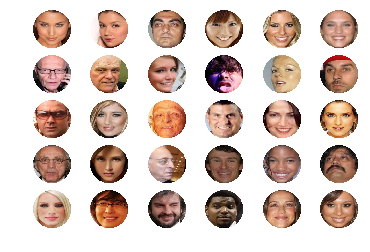

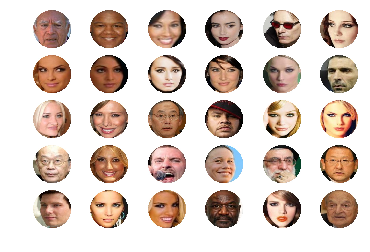

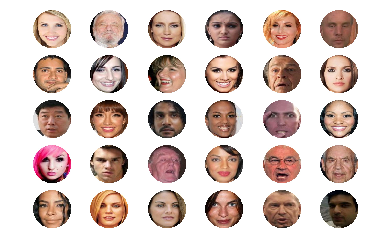

In [40]:
gen_img_collage()